In [1]:
from icevision.all import *

In [2]:
import icedata

In [3]:
class_map = icedata.datasets.pets.class_map()

In [4]:
class_map

<ClassMap: {'background': 0, 'Abyssinian': 1, 'Bengal': 2, 'Birman': 3, 'Bombay': 4, 'British_Shorthair': 5, 'Egyptian_Mau': 6, 'Maine_Coon': 7, 'Persian': 8, 'Ragdoll': 9, 'Russian_Blue': 10, 'Siamese': 11, 'Sphynx': 12, 'american_bulldog': 13, 'american_pit_bull_terrier': 14, 'basset_hound': 15, 'beagle': 16, 'boxer': 17, 'chihuahua': 18, 'english_cocker_spaniel': 19, 'english_setter': 20, 'german_shorthaired': 21, 'great_pyrenees': 22, 'havanese': 23, 'japanese_chin': 24, 'keeshond': 25, 'leonberger': 26, 'miniature_pinscher': 27, 'newfoundland': 28, 'pomeranian': 29, 'pug': 30, 'saint_bernard': 31, 'samoyed': 32, 'scottish_terrier': 33, 'shiba_inu': 34, 'staffordshire_bull_terrier': 35, 'wheaten_terrier': 36, 'yorkshire_terrier': 37}>

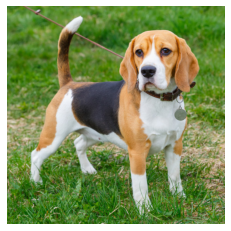

In [5]:
import PIL, requests
def image_from_url(url):
    res = requests.get(url, stream=True)
    img = PIL.Image.open(res.raw)
    return np.array(img)

image_url = "https://petcaramelo.com/wp-content/uploads/2018/06/beagle-cachorro.jpg"
img = image_from_url(image_url)
show_img(img);

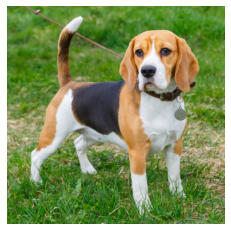

In [6]:
# Maps IDs to class names. `print(class_map)` for all available classes
class_map = icedata.pets.class_map()

# Try experimenting with new images, be sure to take one of the breeds from `class_map`
IMAGE_URL = "https://petcaramelo.com/wp-content/uploads/2018/06/beagle-cachorro.jpg"
IMG_PATH = "tmp.jpg"
# Model trained in `Tutorials->Getting Started`
WEIGHTS_URL = "https://github.com/airctic/model_zoo/releases/download/pets_faster_resnet50fpn/pets_faster_resnetfpn50.zip"

# Download and open image, optionally show it
download_url(IMAGE_URL, IMG_PATH)
img = open_img(IMG_PATH)
show_img(img, show=True)

# The model was trained with normalized images, it's necessary to do the same in inference
tfms = tfms.A.Adapter([tfms.A.Normalize()])

# Whenever you have images in memory (numpy arrays) you can use `Dataset.from_images`
infer_ds = Dataset.from_images([img], tfms)

In [10]:
WEIGHTS_URL = "https://github.com/airctic/model_zoo/releases/download/m3/pets_faster_resnetfpn50.zip"

In [11]:
model = faster_rcnn.model(num_classes=len(class_map))
state_dict = torch.hub.load_state_dict_from_url(
    WEIGHTS_URL, map_location=torch.device("cpu")
)
model.load_state_dict(state_dict)

Downloading: "https://github.com/airctic/model_zoo/releases/download/m3/pets_faster_resnetfpn50.zip" to /home/user/.cache/torch/hub/checkpoints/pets_faster_resnetfpn50.zip


<All keys matched successfully>

In [12]:
batch, samples = faster_rcnn.build_infer_batch(infer_ds)
preds = faster_rcnn.predict(model=model, batch=batch)

/home/user/anaconda3/envs/newfastai/lib/python3.7/site-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


In [13]:
infer_dl = faster_rcnn.infer_dl(infer_ds, batch_size=1)
samples, preds = faster_rcnn.predict_dl(model=model, infer_dl=infer_dl)


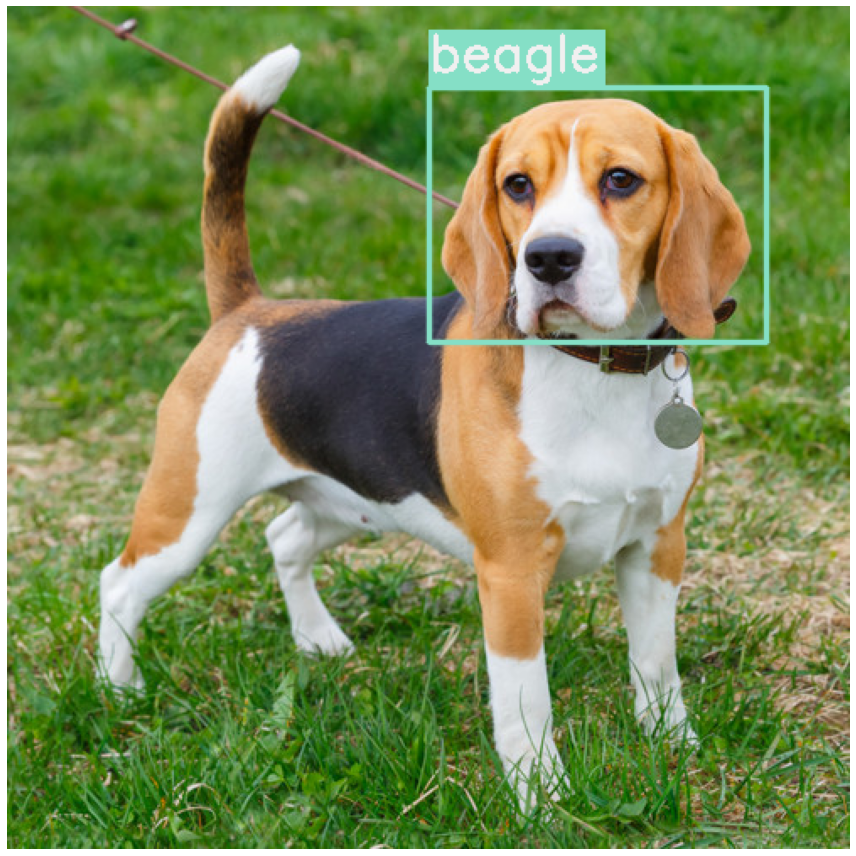

In [14]:
imgs = [sample["img"] for sample in samples]
show_preds(
    imgs=imgs,
    preds=preds,
    class_map=class_map,
    denormalize_fn=denormalize_imagenet,
    show=True,
)

<AxesSubplot:>

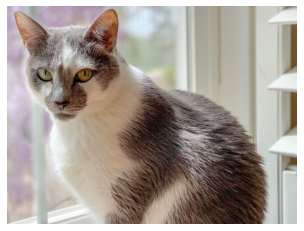

In [30]:
import cv2

img = cv2.imread('../../../cat.jpg')

imgt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

show_img(imgt)

In [32]:
class_map

<ClassMap: {'background': 0, 'Abyssinian': 1, 'Bengal': 2, 'Birman': 3, 'Bombay': 4, 'British_Shorthair': 5, 'Egyptian_Mau': 6, 'Maine_Coon': 7, 'Persian': 8, 'Ragdoll': 9, 'Russian_Blue': 10, 'Siamese': 11, 'Sphynx': 12, 'american_bulldog': 13, 'american_pit_bull_terrier': 14, 'basset_hound': 15, 'beagle': 16, 'boxer': 17, 'chihuahua': 18, 'english_cocker_spaniel': 19, 'english_setter': 20, 'german_shorthaired': 21, 'great_pyrenees': 22, 'havanese': 23, 'japanese_chin': 24, 'keeshond': 25, 'leonberger': 26, 'miniature_pinscher': 27, 'newfoundland': 28, 'pomeranian': 29, 'pug': 30, 'saint_bernard': 31, 'samoyed': 32, 'scottish_terrier': 33, 'shiba_inu': 34, 'staffordshire_bull_terrier': 35, 'wheaten_terrier': 36, 'yorkshire_terrier': 37}>

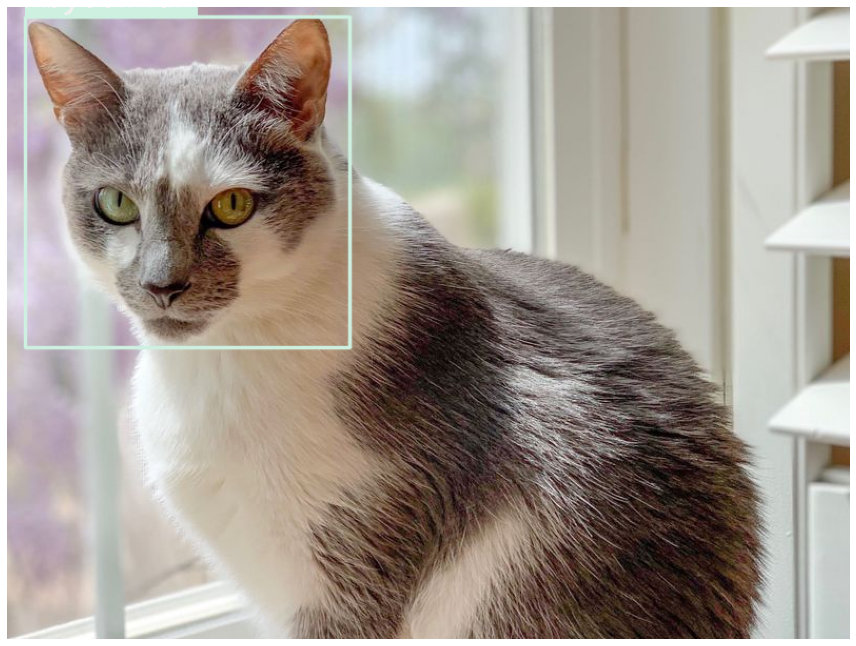

In [31]:
infer_ds = Dataset.from_images([imgt], tfms)

batch, samples = faster_rcnn.build_infer_batch(infer_ds)
preds = faster_rcnn.predict(model=model, batch=batch)

infer_dl = faster_rcnn.infer_dl(infer_ds, batch_size=1)
samples, preds = faster_rcnn.predict_dl(model=model, infer_dl=infer_dl)

imgs = [sample["img"] for sample in samples]
show_preds(
    imgs=imgs,
    preds=preds,
    class_map=class_map,
    denormalize_fn=denormalize_imagenet,
    show=True,
)